## Uitwerkingen opdrachten college 2

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.colors as pc
import ipywidgets as widgets
from IPython.display import display


### Deel 1 - Statistieken van entiteiten visualiseren

**Opdracht 1.** Statistieken van patiënten

Maak visualisaties van de volgende statistieken:
- Distributie van de tijd in de wachtrij van alle patiënten  
- Distributie van de tijd in bed van alle patiënten  

#### Implementatie
- Input: ```ICU - Patient_timing.csv``` bevat statistieken van de patiënten op elk tijdstip: de duur in de wachtrij en bed, en het resultaat
- Features (visualisatie): waiting (histogram en box plot), bed_time (histogram en box plot), treated en died (bar chart)

In [2]:
df = pd.read_csv('ICU - Patient_Timing.csv')
df

,beds.slots,world_id,id,condition,arrived,waiting,bed_time,treated,died
0,165,0,0,A,0.0,0.0,24.2,24.2,NaN
1,165,0,1,B,0.0,0.0,27.2,27.2,NaN
2,165,0,2,B,0.0,0.0,26.2,26.2,NaN
3,165,0,3,B,0.0,0.0,22.2,22.2,NaN
4,165,0,4,B,0.0,0.0,28.2,28.2,NaN
...,...,...,...,...,...,...,...,...,...
1975,215,2,655,A,119.0,0.0,24.2,143.2,NaN
1976,215,2,656,B,119.0,0.0,25.2,144.2,NaN
1977,215,2,657,B,119.0,0.0,35.2,154.2,NaN
1978,215,2,658,B,119.0,0.0,21.2,140.2,NaN


#### Distributie van de tijd in de wachtrij van alle patiënten  
In onderstaande visualisatie wordt voor elke world_id een histogram geplot. Omdat de histogrammen over elkaar gelegd worden en daarom niet zo goed te onderscheiden zijn, heb ik een density plot toegevoegd die een lijn over de histogrammen legt. Omdat het aantal verschillende waardes laag is, is die lijn niet zo *smooth*.

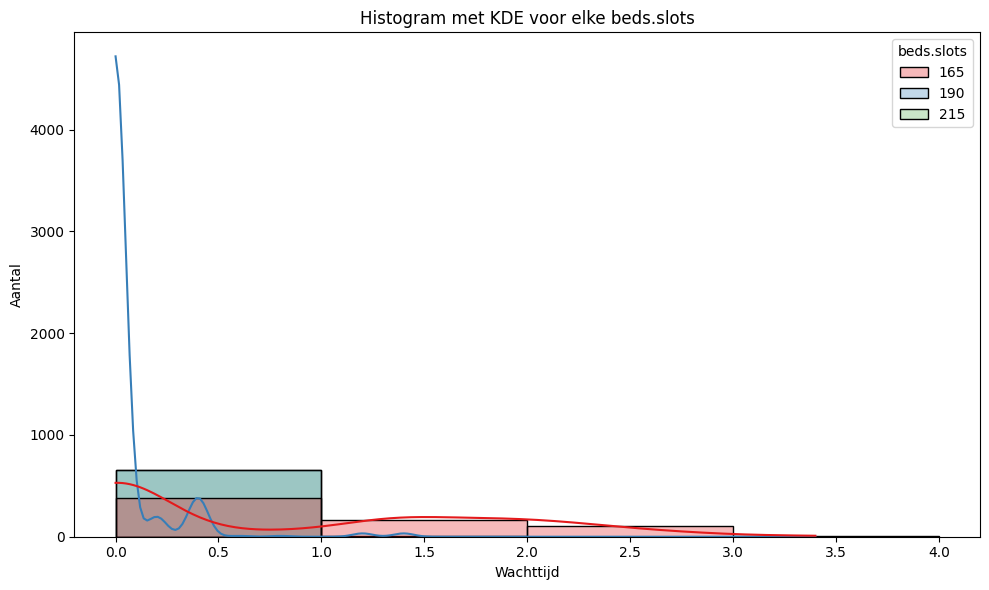

In [3]:
# Maak figuur aan
plt.figure(figsize=(10, 6))

# Maak een histogram aan
sns.histplot(
    data=df,
    x='waiting',
    hue='beds.slots',       # Dit zorgt voor een group_by voor elke beds.slots
    alpha=0.3,
    bins=[0, 1, 2, 3, 4],   # Dit zorgt voor dezelfde bins voor elk histogram
    stat='count',
    common_bins=True,
    palette='Set1',
    kde=True,               # Dit zorgt voor de density plot
    legend=True
)

plt.xlabel('Wachttijd')
plt.ylabel('Aantal')
plt.title('Histogram met KDE voor elke beds.slots')
plt.tight_layout()
plt.show()

Een alternatieve oplossing is om met plotly een interactieve grafiek te maken waarbij je world_id's aan en uit kunt zetten om overzicht te creëren.

In [4]:
# Maak figuur aan
fig = go.Figure()

# Data grouperen op world_id
grouped = df.groupby('beds.slots')

# Vaste bins
bins = np.arange(df['waiting'].min()-0.5, df['waiting'].max()+0.5, 1)

# Loop over alle groepen heen
for name, group in grouped:
    # Maak een histogram
    fig.add_trace(go.Histogram(
        x=group['waiting'],
        xbins=dict(start=bins[0], end=bins[-1], size=bins[1]-bins[0]),  # ensures matching bins
        name=f'beds.slots {name}',
        opacity=0.6
    ))

# Figuur opmaken
fig.update_layout(
    barmode='overlay',                          # Dit zorgt ervoor dat de bars over elkaar geplot worden
    title='Histogram van wachttijd per run',
    xaxis_title='Wachttijd',
    yaxis_title='Aantal',
)
fig.show()

Een derde optie is om handmatig lijnen te plotten omdat die KDE er niet zo mooi uit ziet met kleine waarden. Maar dit is wel een gigantisch blok code...

In [5]:
# Maak figuur aan
fig = go.Figure()

# Data grouperen op world_id
grouped = df.groupby('beds.slots')

# Parameters voor de plot
colors = pc.qualitative.Plotly * ((len(grouped) // len(pc.qualitative.Plotly)) + 1)
bins = np.arange(df['waiting'].min()-0.5, df['waiting'].max()+0.5, 1)
bin_width = bins[1] - bins[0]
bin_centers = np.array(bins) + bin_width / 2

# Loop over alle groepen heen
for i, (name, group) in enumerate(grouped):
    data = group['waiting']
    color = colors[i]
    
    # Maak een histogram
    fig.add_trace(go.Histogram(
        x=data,
        xbins=dict(start=bins[0], end=bins[-1], size=bin_width),
        name=f'beds.slots {name}',
        opacity=0.6,
        marker_color=color,
        showlegend=True
    ))
    
    # Voor elke bin count tellen per bin 
    counts, _ = np.histogram(data, bins=bins)
    
    # Lijn toevoegen
    fig.add_trace(go.Scatter(
        x=bin_centers,
        y=counts,
        mode='lines+markers',
        name=f'Line beds.slots {name}',
        line=dict(color=color, width=2),
        marker=dict(size=6),
        showlegend=False  
    ))

fig.update_layout(
    barmode='overlay',
    title='Histogram van wachttijd per run met verbindingslijnen',
    xaxis_title='Wachttijd',
    yaxis_title='Aantal',
)
fig.show()

Dit kan natuurlijk ook maar is niet zo fraai...

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

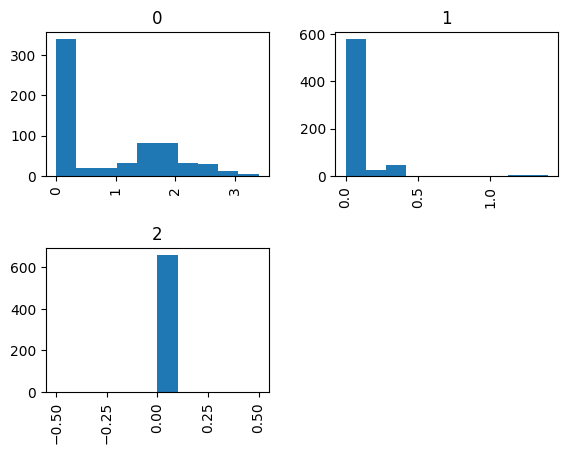

In [6]:
df.hist(column='waiting', by='world_id')

Een boxplot per world_id is ook interessant, maar geeft minder informatie dan een histogram.

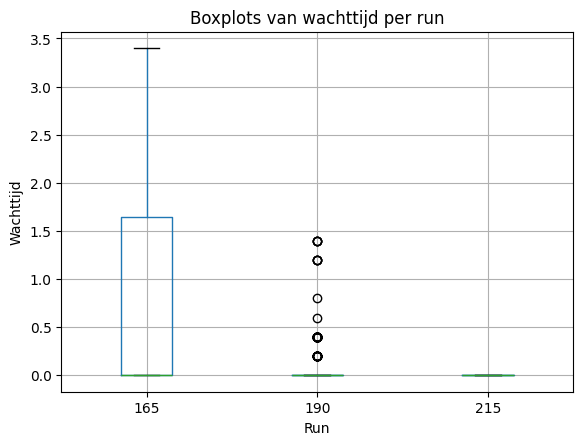

In [7]:
df.boxplot(column='waiting', by='beds.slots')
plt.title('Boxplots van wachttijd per run')
plt.suptitle('')  # Removes the default Pandas subtitle
plt.xlabel('Run')
plt.ylabel('Wachttijd')
plt.show()

Onderstaande visualisatie vond ik het meest interessant, nu is deze gevuld met de ligtijd. Deze visualisatie zegt eigenlijk heel weinig want de ligtijd is (uiteraard) voor elk scenario bijna hetzelfde...

In [8]:
# Maak figuur aan
fig = go.Figure()

# Data grouperen op world_id
grouped = df.groupby('beds.slots')

# Parameters voor de plot
colors = pc.qualitative.Plotly * ((len(grouped) // len(pc.qualitative.Plotly)) + 1)

# Bins maken van 1 tot en met de maximale tijd, omdat de maximale tijd best lang is worden er bins van 10 gemaakt
# Merk op: soms is de ligtijd 0 maar dat gaat over patiënten die in de wachtrij zijn overleden
bins = np.arange(1, df['bed_time'].max()+1, 10)
bin_width = bins[1] - bins[0]
bin_centers = np.array(bins[:-1]) + bin_width / 2

# Loop over alle groepen heen
for i, (name, group) in enumerate(grouped):
    data = group['bed_time']
    color = colors[i]
    
    # Maak een histogram
    fig.add_trace(go.Histogram(
        x=data,
        xbins=dict(start=bins[0], end=bins[-1], size=bin_width),
        name=f'beds.slots {name}',
        opacity=0.3,
        marker_color=color,
        showlegend=True
    ))
    
    # Voor elke bin count tellen per bin 
    counts, _ = np.histogram(data, bins=bins)
    
    # Lijn toevoegen
    fig.add_trace(go.Scatter(
        x=bin_centers,
        y=counts,
        mode='lines+markers',
        name=f'Line beds.slots {name}',
        line=dict(color=color, width=2),
        marker=dict(size=6),
        showlegend=False  
    ))

fig.update_layout(
    barmode='overlay',
    title='Histogram van ligtijd per run met verbindingslijnen',
    xaxis_title='Wachttijd',
    yaxis_title='Aantal',
)
fig.show()

### Deel 2 - Statistieken van scenario visualiseren

**Opdracht 2.** Statistieken van entiteiteiten

ij de tweede opdracht gaan we niet naar individuele patiënten kijken maar naar alle patiënten *samen* in een bepaalde state. We gaan de statistieken van de wachtrij en de bedden van de ICU analyseren en kijken naar de hoeveelheid patiënten die beter naar huis gaan of komen te overlijden. Deze data is te vinden in ```ICU - ICU.csv```.

Maak visualisaties van de volgende statistieken:
- Distributie van het aantal mensen in de wachtrij  
- Distributie van het aantal bezette bedden  
- Verloop van het aantal behandelde en overleden patiënten over de tijd 

#### Implementatie
- Input: ```ICU - ICU.csv``` bevat informatie van de ICU op elk tijdstip: het aantal patiënten in de wachtrij, het aantal patiënten in bedden en het aantal behandelde en overleden patiënten.
- Features (visualisatie): Beds in use (histogram), Patients waiting (histogram), Patients treated (lijn), Patients died (line)
- Pull down: aantal bedden

Een eenvoudigere aanpak kan natuurlijk ook waarbij je voor elke KPI een aparte visualisatie maakt

In [69]:
df = pd.read_csv('ICU - ICU.csv')
df

,beds.slots,world_id,hours,Beds in use,Patients waiting,Patients treated,Patients died
0,115,0,0.0,6.0,0.0,0.0,0.0
1,115,0,1.0,10.0,0.0,0.0,0.0
2,115,0,2.0,17.0,0.0,0.0,0.0
3,115,0,3.0,19.0,0.0,0.0,0.0
4,115,0,4.0,26.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
846,215,4,185.0,1.0,0.0,659.0,0.0
847,215,4,186.0,1.0,0.0,659.0,0.0
848,215,4,187.0,1.0,0.0,659.0,0.0
849,215,4,188.0,0.0,0.0,659.0,0.0


In onderstaande visualisatie wordt voor elke world_id de distributie van het aantal bedden in gebruik en het aantal patiënten in de wachtrij getoond en het verloop van het aantal behandelde en overleden patiënten.

In [70]:
# Visualisatie van Perplexity.AI

# Dropdown widget maken om world_id te selecteren
world_id_dropdown = widgets.Dropdown(
    options=sorted(df['world_id'].unique()), # Mogelijke opties in dropdown
    description='world_id:',
    value=sorted(df['world_id'].unique())[0] # Default waarde
)

# Functie om de visualisatie te updaten
def update_plots(selected_world_id):
    
    # Subset van de data op basis van de gekozen world_id
    filtered = df[df['world_id'] == selected_world_id]

    # Figuur aanmaken
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            "Distributie aantal bedden in gebruik",
            "Distributie aantal patiënten in wachtrij",
            "Aantal patiënten behandeld over de looptijd",
            "Aantal patiënten overleden over de looptijd"
        )
    )

    # Histogram: Beds in use
    fig.add_trace(
        go.Histogram(x=filtered['Beds in use'], name='Beds in use'),
        row=1, col=1
    )

    # Histogram: Patients waiting
    fig.add_trace(
        go.Histogram(x=filtered['Patients waiting'], name='Patients waiting'),
        row=1, col=2
    )

    # Line: Hours vs Patients treated
    fig.add_trace(
        go.Scatter(x=filtered['hours'], y=filtered['Patients treated'], mode='lines+markers', name='Patients treated'),
        row=2, col=1
    )

    # Line: Hours vs Patients died
    fig.add_trace(
        go.Scatter(x=filtered['hours'], y=filtered['Patients died'], mode='lines+markers', name='Patients died'),
        row=2, col=2
    )

    fig.update_layout(height=700, width=1000, showlegend=False)
    fig.show()

# Main functie die een visualisatie maakt op basis van een selectie
widgets.interact(update_plots, selected_world_id=world_id_dropdown)

interactive(children=(Dropdown(description='world_id:', options=(np.int64(0), np.int64(1), np.int64(2), np.int…

<function __main__.update_plots(selected_world_id)>

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

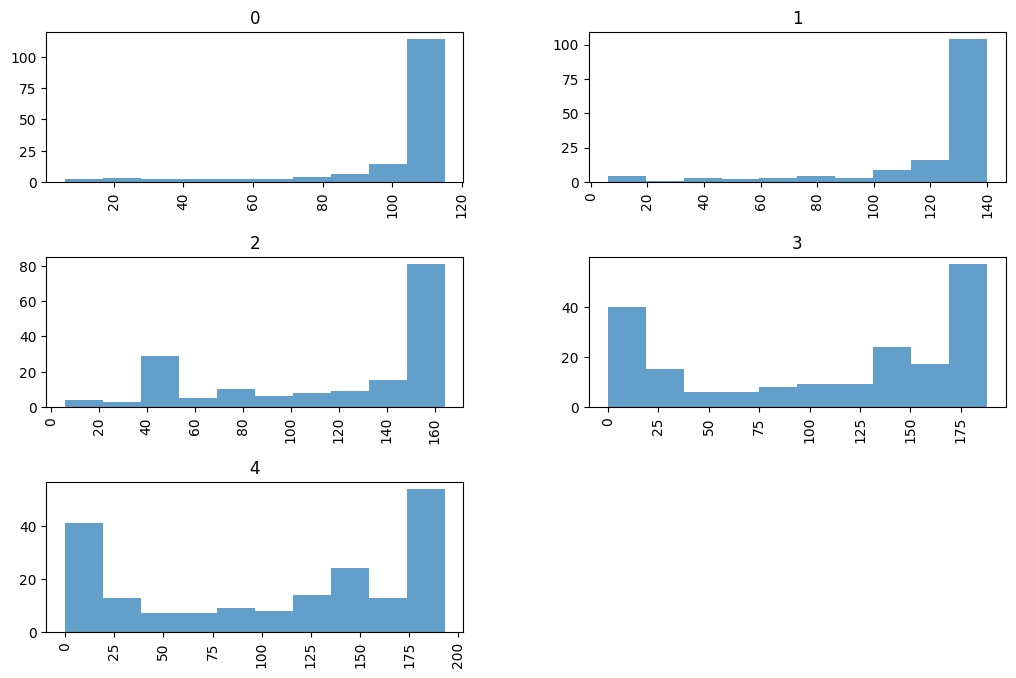

In [71]:
# Nog simpeler met Pandas maar wel minder fancy
df['Beds in use'].hist(by=df['world_id'], alpha=0.7, figsize=(12, 8))

**Opdracht 2.2.** Runs vergelijken

Onderstaande visualisatie is *over the top*, veel te complex.

In [72]:
# Get unique group labels
world_ids = sorted(df['world_id'].unique())

# Prepare the combined figure
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[
        "Distributie aantal bedden in gebruik",
        "Distributie aantal patiënten in wachtrij",
        "Aantal patiënten behandeld over de looptijd",
        "Aantal patiënten overleden over de looptijd"
    ]
)

# For each group, add their data to each subplot
for world_id in world_ids:
    filtered = df[df['world_id'] == world_id]

    # Histogram: Beds in use
    fig.add_trace(
        go.Histogram(
            x=filtered['Beds in use'],
            name=f'Beds in use (world_id {world_id})',
            opacity=0.3
        ),
        row=1, col=1
    )
    # Histogram: Patients waiting
    fig.add_trace(
        go.Histogram(
            x=filtered['Patients waiting'],
            name=f'Patients waiting (world_id {world_id})',
            opacity=0.3
        ),
        row=1, col=2
    )
    # Line: Hours vs Patients treated
    fig.add_trace(
        go.Scatter(
            x=filtered['hours'],
            y=filtered['Patients treated'],
            mode='lines+markers',
            name=f'Patients treated (world_id {world_id})'
        ),
        row=2, col=1
    )
    # Line: Hours vs Patients died
    fig.add_trace(
        go.Scatter(
            x=filtered['hours'],
            y=filtered['Patients died'],
            mode='lines+markers',
            name=f'Patients died (world_id {world_id})'
        ),
        row=2, col=2
    )

# Optionally adjust histogram mode to 'overlay' for better visibility
fig.update_layout(
    height=700,
    width=1000,
    barmode='overlay',  # overlay histograms for comparison
    showlegend=True,
    title='Vergelijkende visualisaties per world_id'
)

fig.show()

Omdat het bereik veel groter is, is de density plot nu wel een optie, vandaar dat ik het eerst weer met seaborn geprobeerd heb.

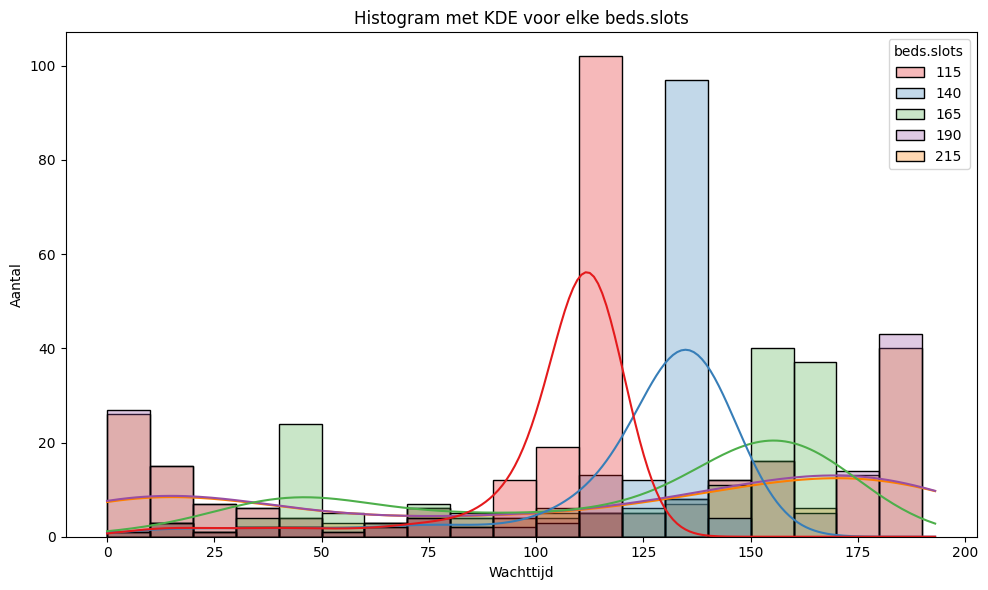

In [73]:
# Maak figuur aan
plt.figure(figsize=(10, 6))

# Maak een histogram aan
sns.histplot(
    data=df,
    x='Beds in use',
    hue='beds.slots',       # Dit zorgt voor een group_by voor elke beds.slots
    alpha=0.3,
    bins = np.arange(start=0, stop=df['Beds in use'].max()+1, step=10),   # Dit zorgt voor dezelfde bins voor elk histogram
    stat='count',
    common_bins=True,
    palette='Set1',
    kde=True,               # Dit zorgt voor de density plot
    legend=True
)

plt.xlabel('Wachttijd')
plt.ylabel('Aantal')
plt.title('Histogram met KDE voor elke beds.slots')
plt.tight_layout()
plt.show()

Ook weer even de plot van opdracht 1 hergebruiken.

In [74]:
# Maak figuur aan
fig = go.Figure()

# Data grouperen op world_id
grouped = df.groupby('beds.slots')

# Parameters voor de plot
colors = pc.qualitative.Plotly * ((len(grouped) // len(pc.qualitative.Plotly)) + 1)

# Bins maken van 1 tot en met de maximale tijd
# Merk op: ik heb nu bins van 10 gemaakt omdat dat voor meer overzicht zorgt
bins = np.arange(start=0, stop=df['Beds in use'].max()+1, step=10)
bin_width = bins[1] - bins[0]
bin_centers = np.array(bins[:-1]) + bin_width / 2

# Loop over alle groepen heen
for i, (name, group) in enumerate(grouped):
    data = group['Beds in use']
    color = colors[i]
    
    # Maak een histogram
    fig.add_trace(go.Histogram(
        x=data,
        xbins=dict(start=bins[0], end=bins[-1], size=bin_width),
        name=f'beds.slots {name}',
        opacity=0.3,
        marker_color=color,
        showlegend=True
    ))
    
    # Voor elke bin count tellen per bin 
    counts, _ = np.histogram(data, bins=bins)
    
    # Lijn toevoegen
    fig.add_trace(go.Scatter(
        x=bin_centers,
        y=counts,
        mode='lines+markers',
        name=f'Line beds.slots {name}',
        line=dict(color=color, width=2),
        marker=dict(size=6),
        showlegend=False  
    ))

fig.update_layout(
    barmode='overlay',
    title='Histogram van wachttijd per run met verbindingslijnen',
    xaxis_title='Wachttijd',
    yaxis_title='Aantal',
)
fig.show()

### Deel 3 - Analyse experiment

Bij het derde deel gaan we de stap nemen naar de volgende datalaag en gaan we het gehele experiment analyseren. Dat resulteert in dataframe waarmee we alle KPI's van elk scenario kunnen bepalen.

De KPI's die we willen visualiseren zijn de volgende:
- Aantal doden
- Gemiddelde en maximale wachttijd van patiënten
- Gemiddelde en maximale aantal mensen in de wachtrij
- Gemiddelde en maximale bezetting van de bedden

**Opdracht 3.1.** Data combineren en aggregeren

Op basis van de statistieken van alle entiteiten uit deel 1 en de statistieken van het scenario uit deel 2, kun je alle data verzamelen om scenario' onderling te vergelijken.  

Je zult twee acties moeten uitvoeren:
1. De eerste stap is het combineren van de data: denk na over welke informatie uit opdrachten 1 en 2 interessant is om te tonen. 
2. De tweede stap is het aggregeren van data: hierbij voer je bepaalde berekeningen uit op de inhoud van alle rijen van een bepaalde feature. 

#### Data collection
Beide datasets zijn nodig. De gemiddelde wachttijd van patiënten komt uit ICU - Patient_Timing.csv, het aantal doden en de gemiddelde bezetting van de bedden uit ICU - ICU.csv.

In [75]:
# Data ophalen en aggregeren
df_patients = pd.read_csv('ICU - Patient_Timing.csv')
df_patients_agg = df_patients.groupby('world_id').agg({
    'waiting': ['mean', 'max']
})
df_patients_agg.reset_index()


world_id   waiting     
                mean  max
0        0  2.739394  7.0
1        1  2.122727  5.0
2        2  1.139394  4.0
3        3  0.163636  2.0
4        4  0.000000  0.0

In [76]:
# Data ophalen en aggregeren
df_ICU = pd.read_csv('ICU - ICU.csv')
df_ICU_agg = df_ICU.groupby('world_id').agg({
    'Beds in use': ['mean', 'max'],
    'Patients waiting': ['mean', 'max'],
    'Patients treated': 'max',
    'Patients died': 'max'
})
df_ICU_agg.reset_index()

world_id Beds in use        Patients waiting       Patients treated  \
                  mean    max             mean   max              max   
0        0  102.913907  115.0        16.192053  41.0            269.0   
1        1  121.677852  140.0        11.194631  34.0            385.0   
2        2  117.064706  164.0         4.705882  22.0            578.0   
3        3  107.251309  188.0         0.565445   9.0            660.0   
4        4  107.815789  193.0         0.000000   0.0            660.0   

  Patients died  
            max  
0         391.0  
1         275.0  
2          82.0  
3           0.0  
4           0.0

In [77]:
# Datasets joinen
df = df_patients_agg.merge(df_ICU_agg, left_on='world_id', right_on='world_id')
df

waiting      Beds in use        Patients waiting        \
              mean  max        mean    max             mean   max   
world_id                                                            
0         2.739394  7.0  102.913907  115.0        16.192053  41.0   
1         2.122727  5.0  121.677852  140.0        11.194631  34.0   
2         1.139394  4.0  117.064706  164.0         4.705882  22.0   
3         0.163636  2.0  107.251309  188.0         0.565445   9.0   
4         0.000000  0.0  107.815789  193.0         0.000000   0.0   

         Patients treated Patients died  
                      max           max  
world_id                                 
0                   269.0         391.0  
1                   385.0         275.0  
2                   578.0          82.0  
3                   660.0           0.0  
4                   660.0           0.0

In [78]:
# MultiIndex columns plat slaan
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df.reset_index(inplace=True)
df

,world_id,waiting_mean,waiting_max,Beds in use_mean,Beds in use_max,Patients waiting_mean,Patients waiting_max,Patients treated_max,Patients died_max
0,0,2.739394,7.0,102.913907,115.0,16.192053,41.0,269.0,391.0
1,1,2.122727,5.0,121.677852,140.0,11.194631,34.0,385.0,275.0
2,2,1.139394,4.0,117.064706,164.0,4.705882,22.0,578.0,82.0
3,3,0.163636,2.0,107.251309,188.0,0.565445,9.0,660.0,0.0
4,4,0.000000,0.0,107.815789,193.0,0.000000,0.0,660.0,0.0


In onderstaande visualisatie heb ik 4 visualisaties gemaakt (over de wachttijd van patienten, bedden, de wachtrij en het resultaat) waarin telkens twee features gecombineerd zijn. De code is erg omvangrijk (bron: Perplexity), een dashboard met losse visualisaties werkt beter.

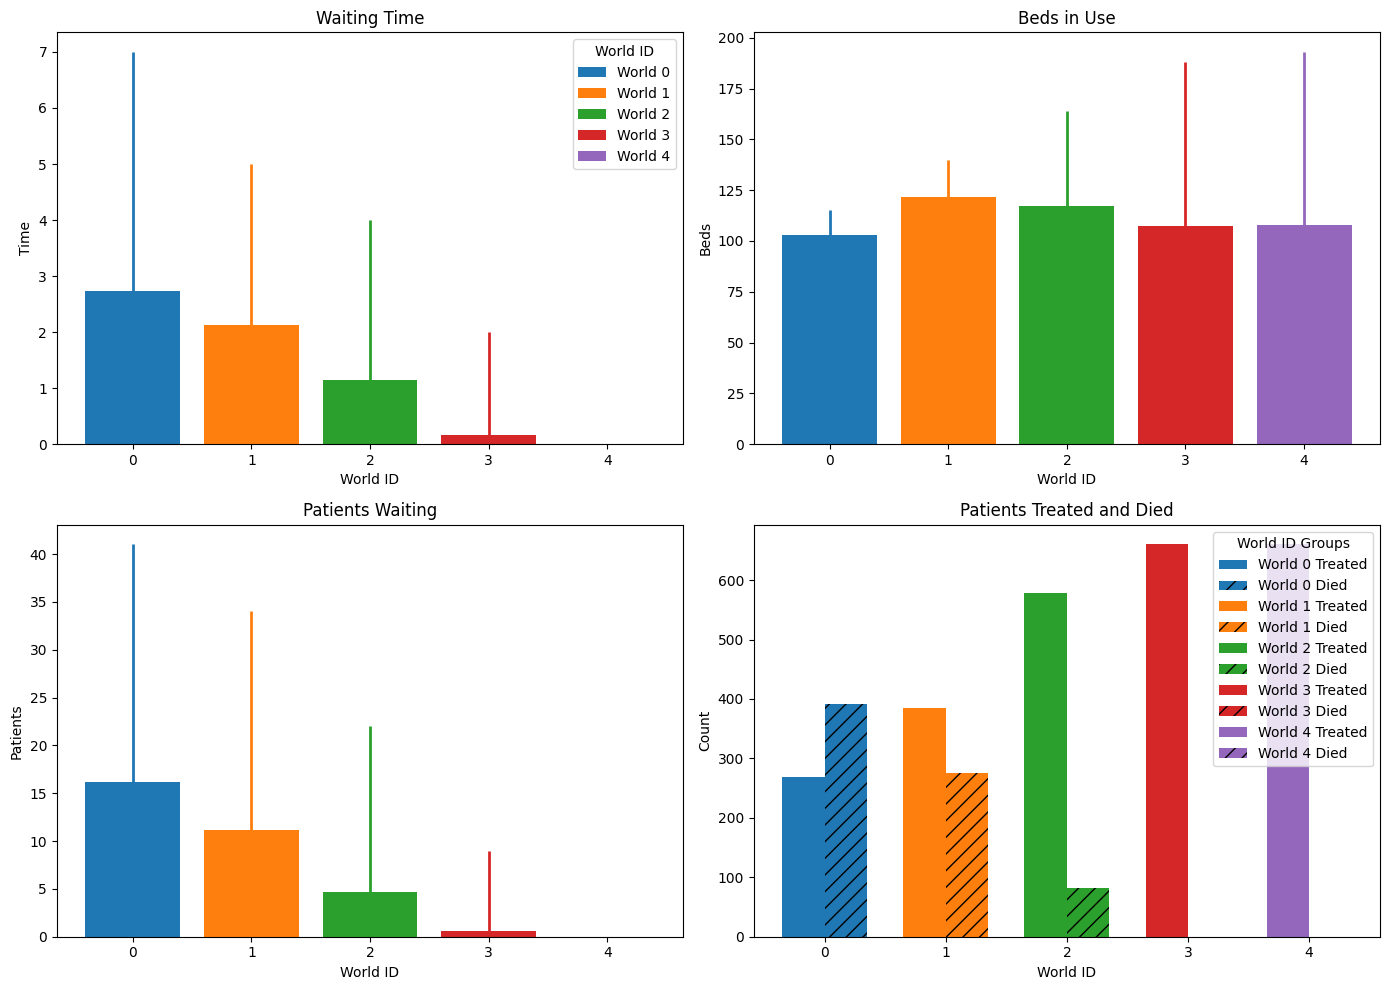

In [79]:
# Assign consistent colors per world_id
world_ids = df['world_id'].unique()
colors = plt.get_cmap('tab10')(range(len(world_ids)))
color_map = dict(zip(world_ids, colors))

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Waiting time: bar for waiting_mean, vertical line up to waiting_max (optional)
ax = axes[0, 0]
for wid in world_ids:
    mean = df.loc[df['world_id'] == wid, 'waiting_mean'].values[0]
    max_val = df.loc[df['world_id'] == wid, 'waiting_max'].values[0]
    ax.bar(wid, mean, color=color_map[wid], label=f'World {wid}')
    # Vertical line instead of horizontal errorbar
    ax.vlines(wid, mean, max_val, color=color_map[wid], linestyle='-', linewidth=2)
ax.set_title('Waiting Time')
ax.set_xlabel('World ID')
ax.set_ylabel('Time')
ax.legend(title='World ID')

# 2. Beds in use: bar for mean and vertical line to max
ax = axes[0, 1]
for wid in world_ids:
    mean = df.loc[df['world_id'] == wid, 'Beds in use_mean'].values[0]
    max_val = df.loc[df['world_id'] == wid, 'Beds in use_max'].values[0]
    ax.bar(wid, mean, color=color_map[wid])
    ax.vlines(wid, mean, max_val, color=color_map[wid], linestyle='-', linewidth=2)
ax.set_title('Beds in Use')
ax.set_xlabel('World ID')
ax.set_ylabel('Beds')

# 3. Patients waiting: bar for mean and vertical line to max
ax = axes[1, 0]
for wid in world_ids:
    mean = df.loc[df['world_id'] == wid, 'Patients waiting_mean'].values[0]
    max_val = df.loc[df['world_id'] == wid, 'Patients waiting_max'].values[0]
    ax.bar(wid, mean, color=color_map[wid])
    ax.vlines(wid, mean, max_val, color=color_map[wid], linestyle='-', linewidth=2)
ax.set_title('Patients Waiting')
ax.set_xlabel('World ID')
ax.set_ylabel('Patients')

# 4. Patients treated and died: grouped bars with same colors for each world_id
ax = axes[1, 1]
bar_width = 0.35
indices = np.arange(len(world_ids))
for i, wid in enumerate(world_ids):
    ax.bar(indices[i] - bar_width / 2, df.loc[df['world_id'] == wid, 'Patients treated_max'].values[0], 
           width=bar_width, color=color_map[wid], label=f'World {wid} Treated')
    # Use a different hatch for died bars to distinguish, keep same color
    ax.bar(indices[i] + bar_width / 2, df.loc[df['world_id'] == wid, 'Patients died_max'].values[0], 
           width=bar_width, color=color_map[wid], hatch='//', label=f'World {wid} Died')
ax.set_xticks(indices)
ax.set_xticklabels(world_ids)
ax.set_title('Patients Treated and Died')
ax.set_xlabel('World ID')
ax.set_ylabel('Count')

# Create combined legend with unique labels 
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='World ID Groups')

plt.tight_layout()
plt.show()